In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn.preprocessing import LabelBinarizer

In [33]:
data = pd.read_csv('D:\Python\Solar-Flare-Data.txt')


In [34]:
print(data.describe())

                A           E           P           H           D          A1  \
count  323.000000  323.000000  323.000000  323.000000  323.000000  323.000000   
mean     1.139319    2.486068    1.191950    1.368421    1.947368    1.027864   
std      0.346816    0.601983    0.590029    0.483125    0.223643    0.164838   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    2.000000    1.000000    1.000000    2.000000    1.000000   
50%      1.000000    3.000000    1.000000    1.000000    2.000000    1.000000   
75%      1.000000    3.000000    1.000000    2.000000    2.000000    1.000000   
max      2.000000    3.000000    3.000000    2.000000    2.000000    2.000000   

               A2          C1          C2          C3  
count  323.000000  323.000000  323.000000  323.000000  
mean     1.755418    0.133127    0.136223    0.021672  
std      0.430506    0.399050    0.479409    0.145836  
min      1.000000    0.000000    0.000000    0

In [35]:
print(data.head())

  CC CLS CS  A  E  P  H  D  A1  A2  C1  C2  C3
0  C   S  O  1  2  1  1  2   1   2   0   0   0
1  D   S  O  1  3  1  1  2   1   2   0   0   0
2  C   S  O  1  3  1  1  2   1   1   0   0   0
3  D   S  O  1  3  1  1  2   1   2   0   0   0
4  D   A  O  1  3  1  1  2   1   2   0   0   0


In [36]:
convert1 = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'H':6}
convert2 = {'X':0,'R':1,'S':2,'A':3,'H':4,'K':5}
convert3 = {'X':0,'O':1,'I':2,'C':3}                           #Preprocessing and Converting The data to Int
data['CC'] = data['CC'].map(convert1)
data['CLS'] = data['CLS'].map(convert2)
data['CS'] = data['CS'].map(convert3)
print(data.head(n=20))

    CC  CLS  CS  A  E  P  H  D  A1  A2  C1  C2  C3
0    2    2   1  1  2  1  1  2   1   2   0   0   0
1    3    2   1  1  3  1  1  2   1   2   0   0   0
2    2    2   1  1  3  1  1  2   1   1   0   0   0
3    3    2   1  1  3  1  1  2   1   2   0   0   0
4    3    3   1  1  3  1  1  2   1   2   0   0   0
5    3    3   1  1  2  1  1  2   1   2   0   0   0
6    3    3   1  1  2  1  1  2   1   1   0   0   0
7    3    3   1  1  2  1  1  2   1   2   0   0   0
8    3    5   1  1  3  1  1  2   1   2   0   0   0
9    2    1   1  1  3  1  1  2   1   1   0   0   0
10   1    0   1  1  3  1  1  2   1   1   0   0   0
11   3    2   1  1  2  1  1  2   1   1   0   0   0
12   2    4   2  1  3  1  1  2   1   2   0   0   0
13   3    1   1  1  3  1  1  2   1   1   0   0   0
14   1    0   1  1  2  1  1  2   1   1   0   0   0
15   1    0   1  1  3  1  1  2   1   1   0   0   0
16   3    5   2  1  3  1  1  2   1   2   0   0   0
17   3    2   1  1  2  1  1  2   1   2   0   0   0
18   3    1   1  1  2  1  1  2 

In [53]:
#print(data['C3'].isnull().sum())

0


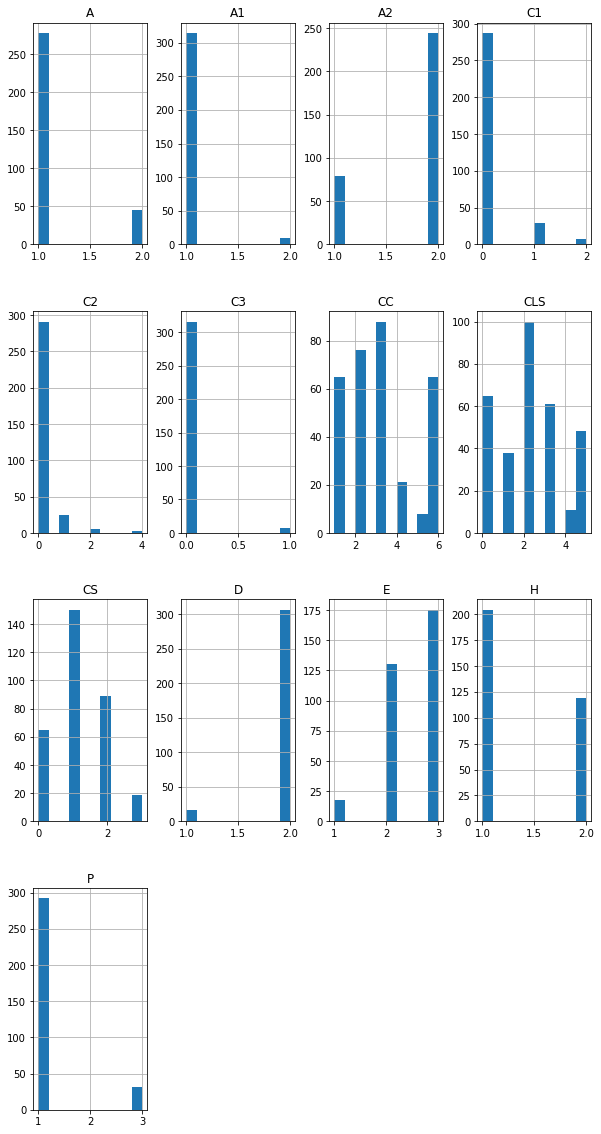

In [66]:
data.hist(figsize=(10,20))    #Visualisations
plt.show()

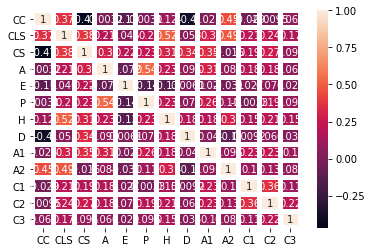

In [71]:
corr = data.corr()
sns.heatmap(corr,annot=True,linewidths=4)
plt.show()


In [74]:
X = data.iloc[:,:10]
Y1 = data.iloc[:,10]
Y2 = data.iloc[:,11]
Y3 = data.iloc[:,12]

In [167]:
clf1 = GridSearchCV(SVC(),param_grid = {'kernel':('linear','rbf'),'C':[0.1,1,2,5,10,20,100],'gamma':np.array([0.1,0.2,0.5,1,2])})
clf1.fit(X,Y1)
clf2 = GridSearchCV(SVC(),param_grid = {'kernel':('linear','rbf'),'C':[0.1,1,2,5,10,20,100],'gamma':np.array([0.1,0.2,0.5,1,2])})
clf2.fit(X,Y1)
clf3 = GridSearchCV(SVC(),param_grid = {'kernel':('linear','rbf'),'C':[0.1,1,2,5,10,20,100],'gamma':np.array([0.1,0.2,0.5,1,2])})
clf3.fit(X,Y1)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.1, 1, 2, 5, 10, 20, 100], 'gamma': array([ 0.1,  0.2,  0.5,  1. ,  2. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [169]:
print(pd.DataFrame(clf1.cv_results_))

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0        0.003670         0.000668         0.888545          0.888563     0.1   
1        0.004004         0.002673         0.888545          0.888563     0.1   
2        0.003001         0.000334         0.888545          0.888563     0.1   
3        0.003001         0.000667         0.888545          0.888563     0.1   
4        0.002330         0.000663         0.888545          0.888563     0.1   
5        0.002670         0.001001         0.888545          0.888563     0.1   
6        0.002670         0.000405         0.888545          0.888563     0.1   
7        0.003334         0.000000         0.888545          0.888563     0.1   
8        0.000000         0.000000         0.888545          0.888563     0.1   
9        0.001667         0.003334         0.888545          0.888563     0.1   
10       0.004995         0.000000         0.888545          0.888563       1   
11       0.001667         0.

In [170]:
print(clf1.best_params_) 
print(clf1.best_score_)           # SVM With linear kernel and c=0.1 , gamma = 0.1 - accuracy~89% all 
print('\n\n\n\n')
print(clf2.best_params_) 
print(clf2.best_score_)    
print('\n\n\n\n')
print(clf3.best_params_) 
print(clf3.best_score_)    

{'C': 0.1, 'gamma': 0.10000000000000001, 'kernel': 'linear'}
0.888544891641





{'C': 0.1, 'gamma': 0.10000000000000001, 'kernel': 'linear'}
0.888544891641





{'C': 0.1, 'gamma': 0.10000000000000001, 'kernel': 'linear'}
0.888544891641


In [160]:
clf1 = GridSearchCV(DecisionTreeClassifier(),param_grid = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10]})
clf2 = GridSearchCV(DecisionTreeClassifier(),param_grid = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10]})
clf3 = GridSearchCV(DecisionTreeClassifier(),param_grid = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10]})
clf1.fit(X,Y1)
clf2.fit(X,Y2)
clf3.fit(X,Y3)

D:\Python\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [166]:
print(clf1.best_params_)
print(clf1.best_score_)
print(pd.DataFrame(clf1.cv_results_))
print('\n\n\n\n')
print(clf2.best_params_)
print(clf2.best_score_)
print(pd.DataFrame(clf2.cv_results_))               #Decision Tree - Accuracy = 89%,89%,98%
print('\n\n\n\n')
print(clf3.best_params_)
print(clf3.best_score_)
print(pd.DataFrame(clf3.cv_results_))

{'C': 0.1, 'gamma': 0.10000000000000001, 'kernel': 'linear'}
0.888544891641
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0        0.004337         0.000668         0.888545          0.888563     0.1   
1        0.005342         0.002336         0.888545          0.888563     0.1   
2        0.002668         0.001335         0.888545          0.888563     0.1   
3        0.003004         0.001003         0.888545          0.888563     0.1   
4        0.003009         0.000662         0.888545          0.888563     0.1   
5        0.003681         0.000986         0.888545          0.888563     0.1   
6        0.002669         0.000667         0.888545          0.888563     0.1   
7        0.004003         0.000669         0.888545          0.888563     0.1   
8        0.005001         0.000000         0.888545          0.888563     0.1   
9        0.004996         0.001666         0.888545          0.888563     0.1   
10       0.005005         0.00000

In [198]:
clf1 = GridSearchCV(RandomForestClassifier(),param_grid={'n_estimators':[10,12,15,20],'max_depth':[1,2,5,10]})
clf2 = GridSearchCV(RandomForestClassifier(),param_grid={'n_estimators':[10,12,15,20],'max_depth':[1,2,5,10]})
clf3 = GridSearchCV(RandomForestClassifier(),param_grid={'n_estimators':[10,12,15,20],'max_depth':[1,2,5,10]})


In [199]:
clf1.fit(X,Y1)
clf2.fit(X,Y2)
clf3.fit(X,Y3)

D:\Python\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 12, 15, 20], 'max_depth': [1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [200]:
print(pd.DataFrame(clf1.cv_results_))
print(clf1.best_score_)
print(clf1.best_params_)             #Accuracy - 89%, 90%, 98%

print('\n\n\n\n')
print(pd.DataFrame(clf2.cv_results_))
print(clf2.best_score_)
print(clf2.best_params_)
print('\n\n\n\n')

print(pd.DataFrame(clf3.cv_results_))
print(clf3.best_score_)
print(clf3.best_params_)

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.022363         0.001996         0.888545          0.888563   
1        0.020710         0.002334         0.888545          0.888563   
2        0.021668         0.001667         0.888545          0.888563   
3        0.030939         0.002668         0.888545          0.888563   
4        0.018340         0.000000         0.888545          0.891663   
5        0.018334         0.001667         0.888545          0.897894   
6        0.021663         0.003334         0.888545          0.894793   
7        0.031676         0.000000         0.888545          0.897894   
8        0.018910         0.002334         0.876161          0.913369   
9        0.020028         0.001669         0.879257          0.911798   
10       0.022732         0.001671         0.876161          0.908711   
11       0.034271         0.002336         0.882353          0.914898   
12       0.017685         0.001664         0.851393

In [219]:
clf1 = GridSearchCV(AdaBoostClassifier(),param_grid={'n_estimators':[1,2,3,5]})
clf2 = GridSearchCV(AdaBoostClassifier(),param_grid={'n_estimators':[1,2,3,5]})
clf3 = GridSearchCV(AdaBoostClassifier(),param_grid={'n_estimators':[1,2,3,5]})

In [222]:
clf1.fit(X,Y1)
clf2.fit(X,Y2)
clf3.fit(X,Y3)

D:\Python\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [223]:
print(clf1.best_score_)
print(clf1.best_params_)
print(pd.DataFrame(clf1.cv_results_))                    #AdaBoosting - Accuracy : 89%, 90%, 97%
print('\n\n\n')
print(clf2.best_score_)
print(clf2.best_params_)
print(pd.DataFrame(clf2.cv_results_))
print('\n\n\n')
print(clf3.best_score_)
print(clf3.best_params_)

0.888544891641
{'n_estimators': 1}
   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.003670         0.000333         0.888545          0.888563   
1       0.005005         0.001001         0.888545          0.888563   
2       0.011679         0.001335         0.888545          0.888563   
3       0.011012         0.001085         0.835913          0.807135   

  param_n_estimators               params  rank_test_score  split0_test_score  \
0                  1  {'n_estimators': 1}                1           0.880734   
1                  2  {'n_estimators': 2}                1           0.880734   
2                  3  {'n_estimators': 3}                1           0.880734   
3                  5  {'n_estimators': 5}                4           0.880734   

   split0_train_score  split1_test_score  split1_train_score  \
0            0.892523           0.888889            0.888372   
1            0.892523           0.888889            0.888372   
2     

In [286]:
model1 = Sequential([Dense(8, input_dim=10), Activation('relu'),Dense(3),Activation('softmax')])

model1.compile(optimizer='adagrad',loss='binary_crossentropy',metrics=['accuracy'])
Xtr1,Xte1,Ytr1,Yte1 = train_test_split(X,Y1,train_size=0.7)


lb = LabelBinarizer()
lb.fit(np.array([0,1,2]))
Ytr1 = lb.transform(Ytr1)
Yte1 = lb.transform(Yte1)

D:\Python\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [285]:
model1.fit(Xtr1.values,Ytr1,epochs=1,batch_size=20)
print(model1.output)
print(model1.evaluate(Xte1.values,Yte1))

Epoch 1/1
226/226 [==============================] - 0s - loss: 0.2481 - acc: 0.9322     
Tensor("activation_71/Softmax:0", shape=(?, 3), dtype=float32)
32/97 [========>.....................] - ETA: 0s[0.29666520547621028, 0.91065294718004997]
